In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt


In [2]:
train_data=pd.read_csv("/home/manikanta/Downloads/Credit_card_default_prediction/train.csv")
test_data=pd.read_csv("/home/manikanta/Downloads/Credit_card_default_prediction/test.csv")
                       

In [3]:
train_data.head()

Customer_id  Balance_limit  Gender  Education Marital_status  Age_in_years  \
0     C115337       252000.0  Female  Doctorate        married          47.0   
1     C117160        60000.0  Female    Masters         single          41.0   
2     C120049        60000.0  Female    Masters        married          48.0   
3     C122231        72000.0  Female    Masters         single          41.0   
4     C123224       192000.0  Female    Masters         single          60.0   

   Pay_status_Apr20  Pay_status_May20  Pay_status_Jun20  Pay_status_Jul20  \
0              -1.0              -1.0              -1.0              -1.0   
1               1.0               2.0               2.0               2.0   
2              -1.0              -1.0              -1.0              -1.0   
3               2.0               0.0               0.0               0.0   
4              -2.0              -2.0              -2.0              -2.0   

   ...  Bill_amount_Jul20  Bill_amount_Aug20  Bill_amount_Sep20  \
0  ...              475.0              475.0              475.0   
1  ...            20105.0            20610.0            21106.0   
2  ...              468.0              468.0              468.0   
3  ...            68305.0            21660.0            22062.0   
4  ...               -1.0               -1.0              720.0   

   Pay_amount_Apr20  Pay_amount_May20  Pay_amount_Jun20  Pay_amount_Jul20  \
0             475.0             475.0             475.0             475.0   
1             360.0            3600.0               0.0            1200.0   
2            1130.0            1130.0             468.0             468.0   
3            3600.0            3720.0            1691.0             757.0   
4               0.0               0.0               0.0               0.0   

   Pay_amount_Aug20  Pay_amount_Sep20  Default_payment_Oct20  
0             475.0             475.0                    Yes  
1             828.0             780.0                    Yes  
2             468.0               0.0                    Yes  
3            1200.0             797.0                    Yes  
4             721.0               0.0                    Yes  

[5 rows x 25 columns]

In [4]:
train_data.tail()

Customer_id  Balance_limit Gender Education Marital_status  \
24021         NaN            NaN    NaN       NaN            NaN   
24022         NaN            NaN    NaN       NaN            NaN   
24023         NaN            NaN    NaN       NaN            NaN   
24024         NaN            NaN    NaN       NaN            NaN   
24025         NaN            NaN    NaN       NaN            NaN   

       Age_in_years  Pay_status_Apr20  Pay_status_May20  Pay_status_Jun20  \
24021           NaN               NaN               NaN               NaN   
24022           NaN               NaN               NaN               NaN   
24023           NaN               NaN               NaN               NaN   
24024           NaN               NaN               NaN               NaN   
24025           NaN               NaN               NaN               NaN   

       Pay_status_Jul20  ...  Bill_amount_Jul20  Bill_amount_Aug20  \
24021               NaN  ...                NaN                NaN   
24022               NaN  ...                NaN                NaN   
24023               NaN  ...                NaN                NaN   
24024               NaN  ...                NaN                NaN   
24025               NaN  ...                NaN                NaN   

       Bill_amount_Sep20  Pay_amount_Apr20  Pay_amount_May20  \
24021                NaN               NaN               NaN   
24022                NaN               NaN               NaN   
24023                NaN               NaN               NaN   
24024                NaN               NaN               NaN   
24025                NaN               NaN               NaN   

       Pay_amount_Jun20  Pay_amount_Jul20  Pay_amount_Aug20  Pay_amount_Sep20  \
24021               NaN               NaN               NaN               NaN   
24022               NaN               NaN               NaN               NaN   
24023               NaN               NaN               NaN               NaN   
24024               NaN               NaN               NaN               NaN   
24025               NaN               NaN               NaN               NaN   

       Default_payment_Oct20  
24021                    NaN  
24022                    NaN  
24023                    NaN  
24024                    NaN  
24025                    NaN  

[5 rows x 25 columns]

In [5]:
test_data.head()

Customer_id  Balance_limit  Gender  Education Marital_status  Age_in_years  \
0     C111490         192000  Female  Doctorate         single            34   
1     C112018         252000  Female  Doctorate         single            35   
2     C113815         216000  Female  Bachelors        married            46   
3     C113946         276000  Female    Masters        married            42   
4     C115574          60000  Female  Bachelors        married            50   

   Pay_status_Apr20  Pay_status_May20  Pay_status_Jun20  Pay_status_Jul20  \
0                 1                 2                 0                 0   
1                 1                 2                 0                 0   
2                 2                 2                 2                 2   
3                 0                 0                 0                 0   
4                 1                 2                 0                 0   

   ...  Bill_amount_Jun20  Bill_amount_Jul20  Bill_amount_Aug20  \
0  ...              67579              71197              72272   
1  ...             182297             178118             181122   
2  ...             219169             163070             162493   
3  ...              21347              17299              17334   
4  ...              20032              20888              22392   

   Bill_amount_Sep20  Pay_amount_Apr20  Pay_amount_May20  Pay_amount_Jun20  \
0              74134                 0              2400              4200   
1             185141              7200              9600              7440   
2             152170                 0             18000                 0   
3              17342              2400              2716              2400   
4              22938                 0              1903              1560   

   Pay_amount_Jul20  Pay_amount_Aug20  Pay_amount_Sep20  
0              2400              2640              3600  
1              7200              6840              6840  
2              5400              6000              6000  
3              2400              2400              2400  
4              1855              1080                 0  

[5 rows x 24 columns]

In [6]:
test_data.tail()

Customer_id  Balance_limit  Gender  Education Marital_status  \
5995     C989689          72000    Male    Masters        married   
5996     C989699         192000    Male  Bachelors        married   
5997     C989837          60000  Female  Bachelors        married   
5998     C989842         276000  Female  Bachelors        married   
5999     C989870         240000  Female    Masters         single   

      Age_in_years  Pay_status_Apr20  Pay_status_May20  Pay_status_Jun20  \
5995            48                 0                -1                -1   
5996            54                 2                 2                 2   
5997            43                 0                 0                 0   
5998            41                -2                -2                -1   
5999            32                 0                 0                 0   

      Pay_status_Jul20  ...  Bill_amount_Jun20  Bill_amount_Jul20  \
5995                 0  ...              69479              36414   
5996                 2  ...             175841             177546   
5997                 0  ...              57089               9136   
5998                -1  ...                226               7798   
5999                 0  ...              44150              59578   

      Bill_amount_Aug20  Bill_amount_Sep20  Pay_amount_Apr20  \
5995              36293              30569              3600   
5996             174586             186049              7920   
5997               9136               9307              2482   
5998              53926              67218                 0   
5999              40198              37074             36042   

      Pay_amount_May20  Pay_amount_Jun20  Pay_amount_Jul20  Pay_amount_Aug20  \
5995             73200              3600              3600              3600   
5996              6600              6372                 0             14400   
5997             21762              2400              1200              1200   
5998               226              7798             48000             14400   
5999             12010             18013              6012               184   

      Pay_amount_Sep20  
5995             10800  
5996                 0  
5997              2400  
5998              3000  
5999             16920  

[5 rows x 24 columns]

In [7]:
train_data.isnull().sum()

Customer_id              26
Balance_limit            26
Gender                   26
Education                26
Marital_status           26
Age_in_years             26
Pay_status_Apr20         26
Pay_status_May20         26
Pay_status_Jun20         26
Pay_status_Jul20         26
Pay_status_Aug20         26
Pay_status_Sep20         26
Bill_amount_Apr20        26
Bill_amount_May20        26
Bill_amount_Jun20        26
Bill_amount_Jul20        26
Bill_amount_Aug20        26
Bill_amount_Sep20        26
Pay_amount_Apr20         26
Pay_amount_May20         26
Pay_amount_Jun20         26
Pay_amount_Jul20         26
Pay_amount_Aug20         26
Pay_amount_Sep20         26
Default_payment_Oct20    26
dtype: int64

In [8]:
test_data.isnull().sum()

Customer_id          0
Balance_limit        0
Gender               0
Education            0
Marital_status       0
Age_in_years         0
Pay_status_Apr20     0
Pay_status_May20     0
Pay_status_Jun20     0
Pay_status_Jul20     0
Pay_status_Aug20     0
Pay_status_Sep20     0
Bill_amount_Apr20    0
Bill_amount_May20    0
Bill_amount_Jun20    0
Bill_amount_Jul20    0
Bill_amount_Aug20    0
Bill_amount_Sep20    0
Pay_amount_Apr20     0
Pay_amount_May20     0
Pay_amount_Jun20     0
Pay_amount_Jul20     0
Pay_amount_Aug20     0
Pay_amount_Sep20     0
dtype: int64

In [9]:
train_data.shape

(24026, 25)

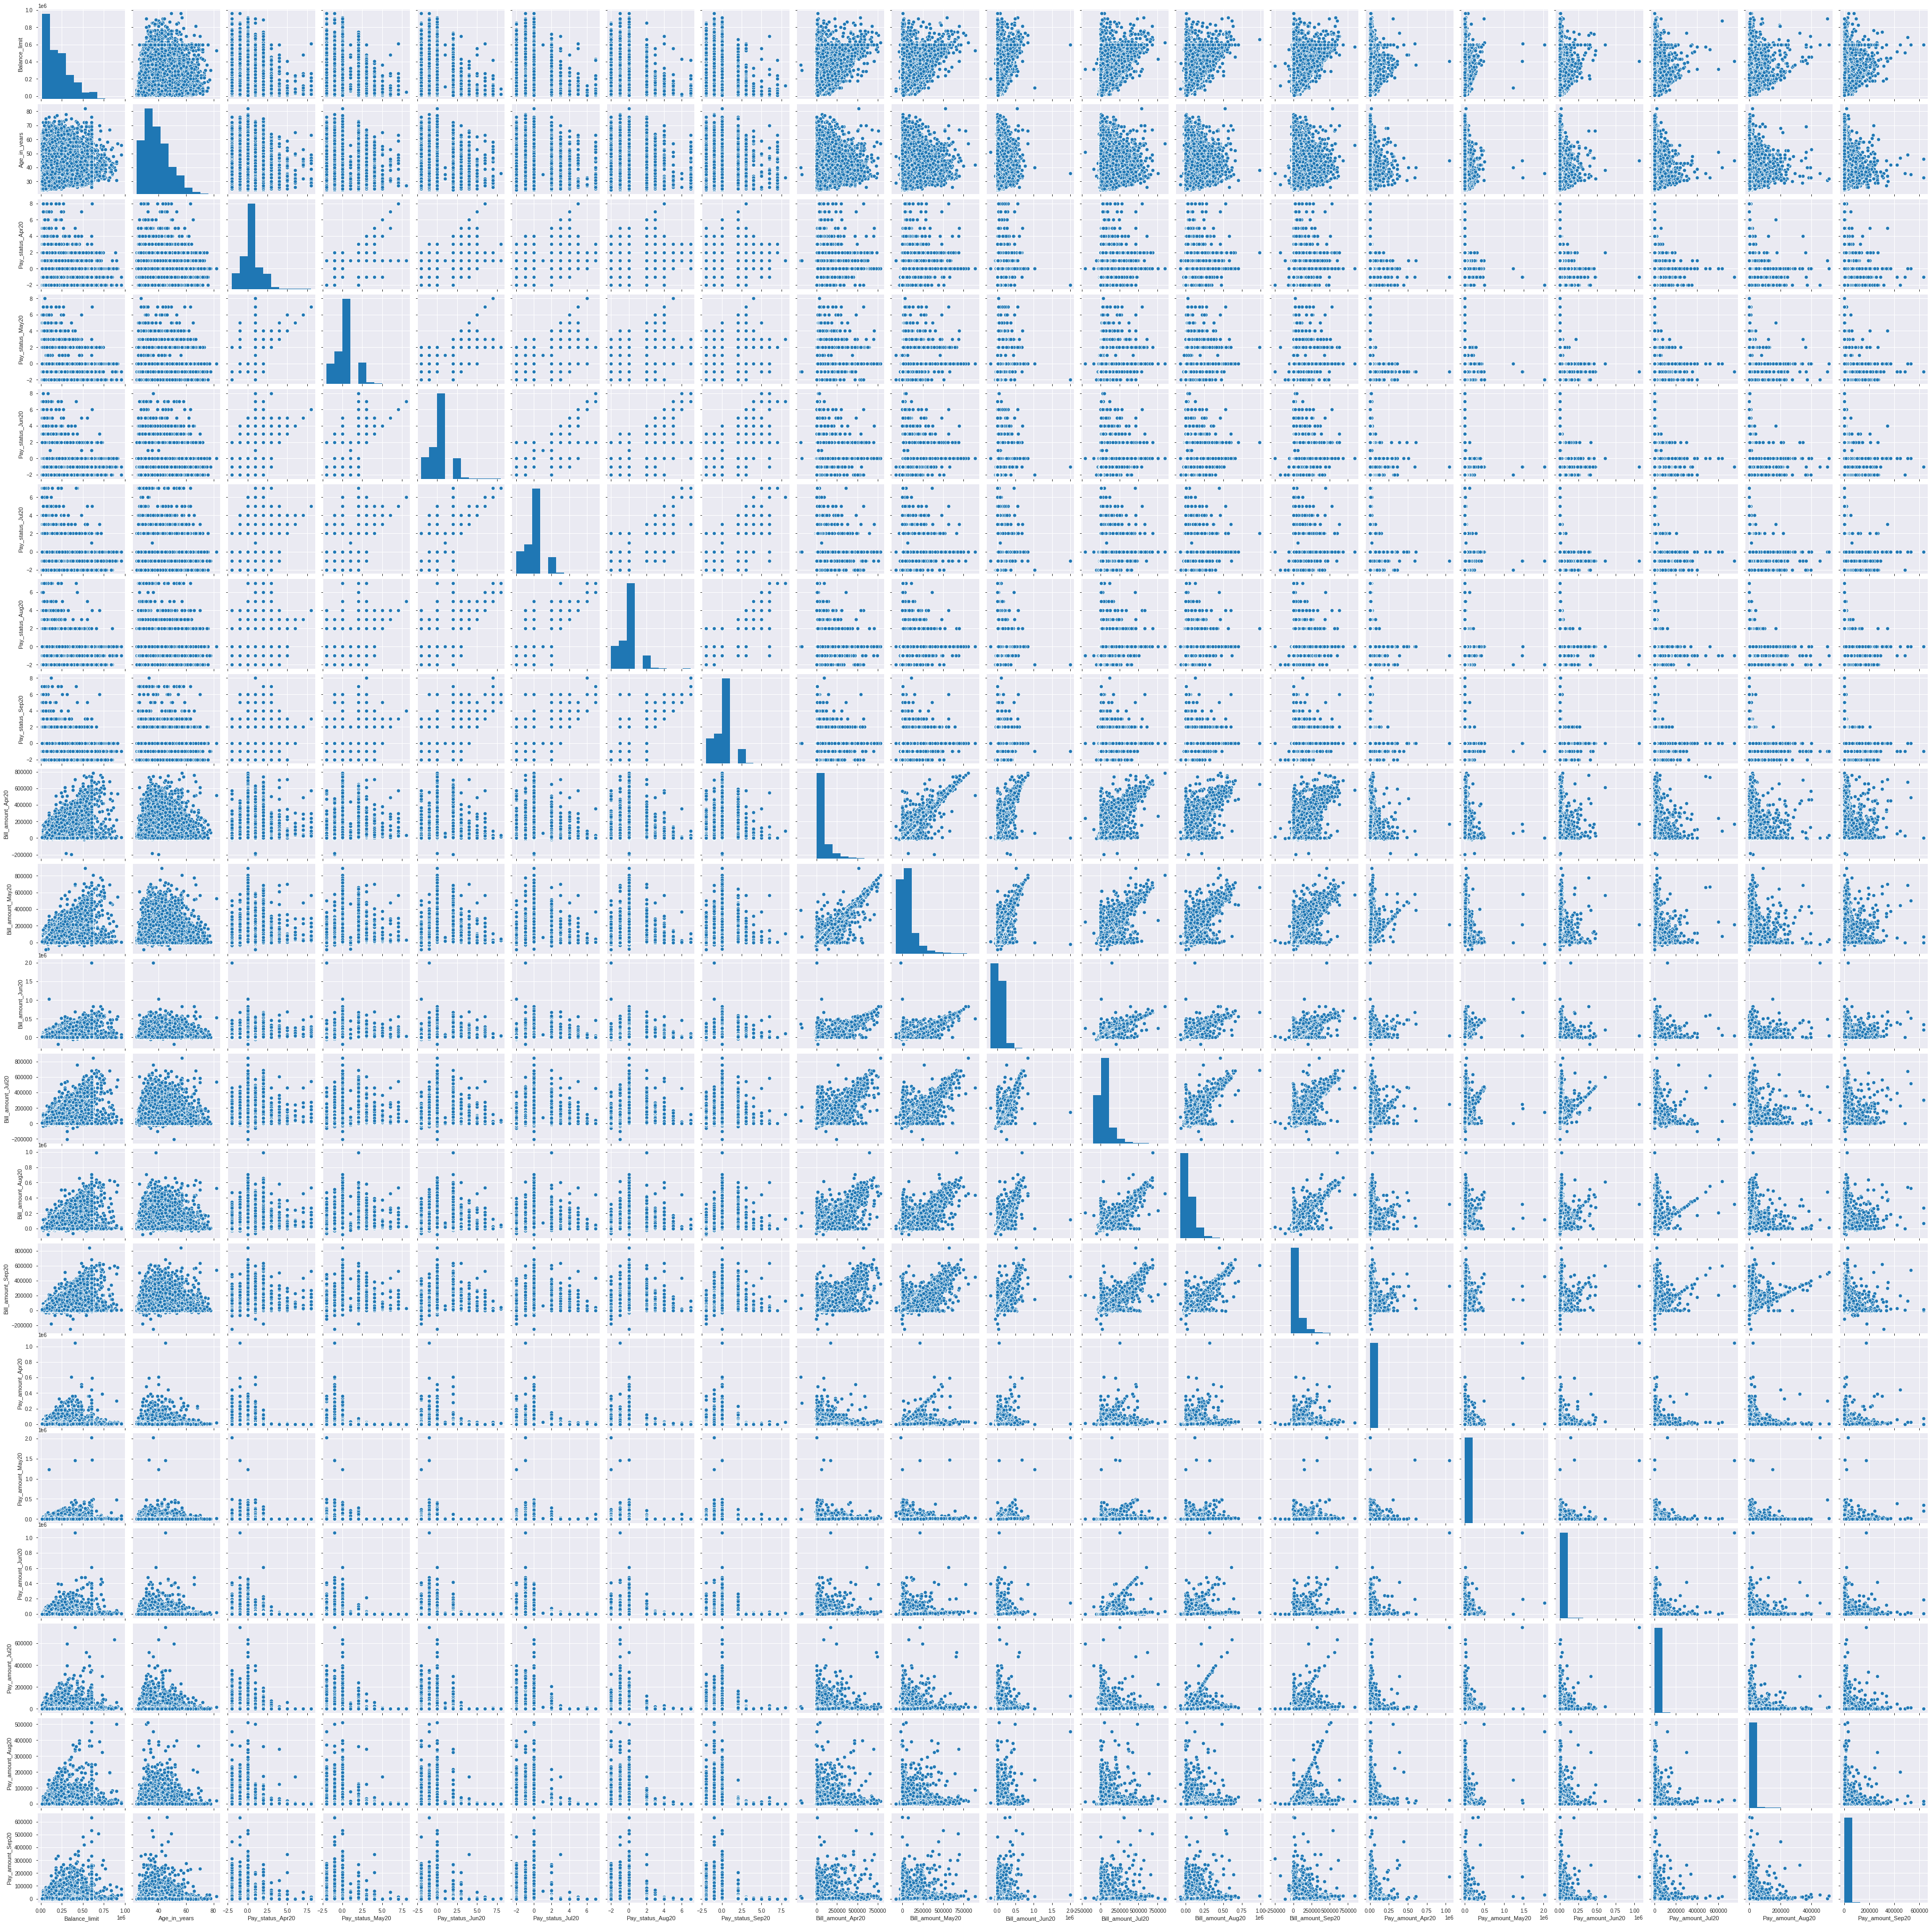

In [10]:
sns.pairplot(train_data)

In [11]:
pandas_profiling.ProfileReport(train_data)

In [12]:
train_data1=train_data.dropna(axis=0)

In [13]:
train_data1.shape

(24000, 25)

In [14]:
test_data.shape

(6000, 24)

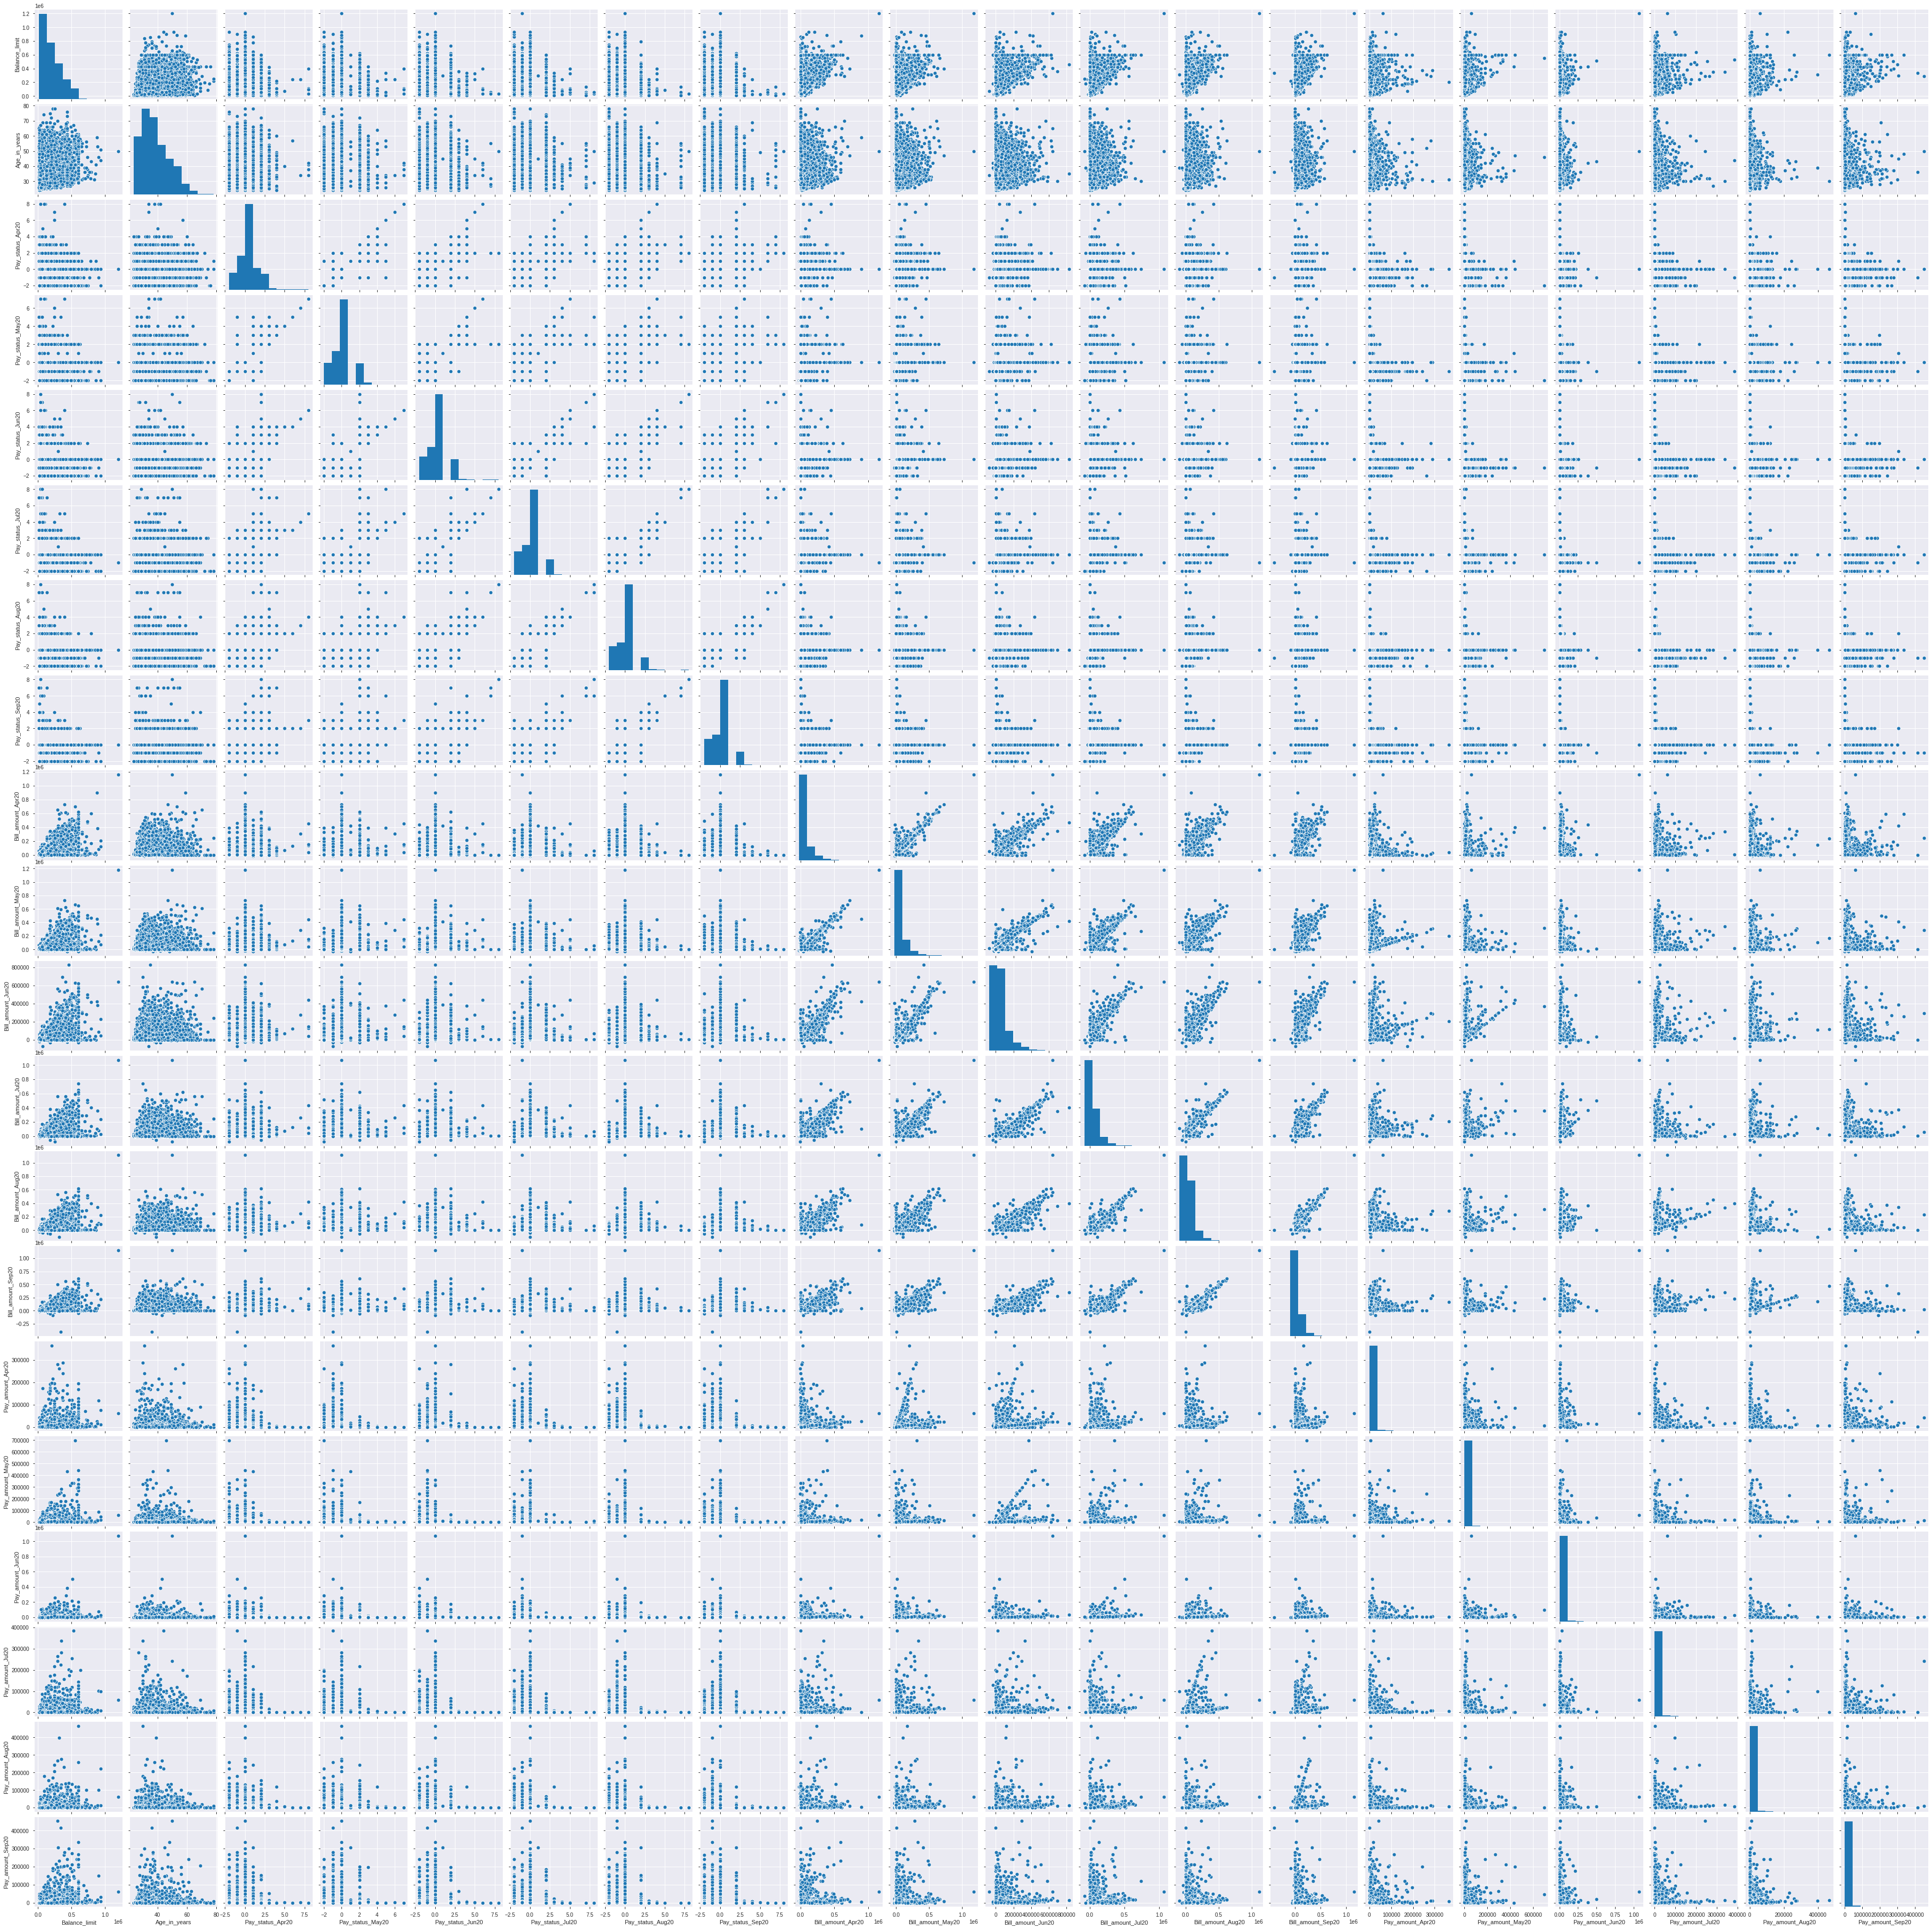

In [15]:
sns.pairplot(test_data)

In [16]:
train_data1.columns

Index(['Customer_id', 'Balance_limit', 'Gender', 'Education', 'Marital_status',
       'Age_in_years', 'Pay_status_Apr20', 'Pay_status_May20',
       'Pay_status_Jun20', 'Pay_status_Jul20', 'Pay_status_Aug20',
       'Pay_status_Sep20', 'Bill_amount_Apr20', 'Bill_amount_May20',
       'Bill_amount_Jun20', 'Bill_amount_Jul20', 'Bill_amount_Aug20',
       'Bill_amount_Sep20', 'Pay_amount_Apr20', 'Pay_amount_May20',
       'Pay_amount_Jun20', 'Pay_amount_Jul20', 'Pay_amount_Aug20',
       'Pay_amount_Sep20', 'Default_payment_Oct20'],
      dtype='object')

In [17]:
train_data1['Customer_id']=train_data1['Customer_id'].str.replace('\D+','').astype(int)

In [18]:
train_data1.head(2)

Customer_id  Balance_limit  Gender  Education Marital_status  Age_in_years  \
0       115337       252000.0  Female  Doctorate        married          47.0   
1       117160        60000.0  Female    Masters         single          41.0   

   Pay_status_Apr20  Pay_status_May20  Pay_status_Jun20  Pay_status_Jul20  \
0              -1.0              -1.0              -1.0              -1.0   
1               1.0               2.0               2.0               2.0   

   ...  Bill_amount_Jul20  Bill_amount_Aug20  Bill_amount_Sep20  \
0  ...              475.0              475.0              475.0   
1  ...            20105.0            20610.0            21106.0   

   Pay_amount_Apr20  Pay_amount_May20  Pay_amount_Jun20  Pay_amount_Jul20  \
0             475.0             475.0             475.0             475.0   
1             360.0            3600.0               0.0            1200.0   

   Pay_amount_Aug20  Pay_amount_Sep20  Default_payment_Oct20  
0             475.0             475.0                    Yes  
1             828.0             780.0                    Yes  

[2 rows x 25 columns]

In [19]:
test_data['Customer_id']=test_data['Customer_id'].str.replace('\D+','').astype(int)


In [20]:
test_data.tail(2)

Customer_id  Balance_limit  Gender  Education Marital_status  \
5998       989842         276000  Female  Bachelors        married   
5999       989870         240000  Female    Masters         single   

      Age_in_years  Pay_status_Apr20  Pay_status_May20  Pay_status_Jun20  \
5998            41                -2                -2                -1   
5999            32                 0                 0                 0   

      Pay_status_Jul20  ...  Bill_amount_Jun20  Bill_amount_Jul20  \
5998                -1  ...                226               7798   
5999                 0  ...              44150              59578   

      Bill_amount_Aug20  Bill_amount_Sep20  Pay_amount_Apr20  \
5998              53926              67218                 0   
5999              40198              37074             36042   

      Pay_amount_May20  Pay_amount_Jun20  Pay_amount_Jul20  Pay_amount_Aug20  \
5998               226              7798             48000             14400   
5999             12010             18013              6012               184   

      Pay_amount_Sep20  
5998              3000  
5999             16920  

[2 rows x 24 columns]

In [21]:
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'species'. 
train_data1['Gender']= label_encoder.fit_transform(train_data1['Gender']) 
train_data1['Gender'].unique() 

train_data1['Education']= label_encoder.fit_transform(train_data1['Education']) 
train_data1['Education'].unique()

train_data1['Marital_status']= label_encoder.fit_transform(train_data1['Marital_status']) 
train_data1['Marital_status'].unique() 


train_data1['Default_payment_Oct20']= label_encoder.fit_transform(train_data1['Default_payment_Oct20']) 
train_data1['Default_payment_Oct20'].unique() 

array([1, 0])

In [22]:
train_data1.head(5)

Customer_id  Balance_limit  Gender  Education  Marital_status  \
0       115337       252000.0       0          1               0   
1       117160        60000.0       0          3               2   
2       120049        60000.0       0          3               0   
3       122231        72000.0       0          3               2   
4       123224       192000.0       0          3               2   

   Age_in_years  Pay_status_Apr20  Pay_status_May20  Pay_status_Jun20  \
0          47.0              -1.0              -1.0              -1.0   
1          41.0               1.0               2.0               2.0   
2          48.0              -1.0              -1.0              -1.0   
3          41.0               2.0               0.0               0.0   
4          60.0              -2.0              -2.0              -2.0   

   Pay_status_Jul20  ...  Bill_amount_Jul20  Bill_amount_Aug20  \
0              -1.0  ...              475.0              475.0   
1               2.0  ...            20105.0            20610.0   
2              -1.0  ...              468.0              468.0   
3               0.0  ...            68305.0            21660.0   
4              -2.0  ...               -1.0               -1.0   

   Bill_amount_Sep20  Pay_amount_Apr20  Pay_amount_May20  Pay_amount_Jun20  \
0              475.0             475.0             475.0             475.0   
1            21106.0             360.0            3600.0               0.0   
2              468.0            1130.0            1130.0             468.0   
3            22062.0            3600.0            3720.0            1691.0   
4              720.0               0.0               0.0               0.0   

   Pay_amount_Jul20  Pay_amount_Aug20  Pay_amount_Sep20  Default_payment_Oct20  
0             475.0             475.0             475.0                      1  
1            1200.0             828.0             780.0                      1  
2             468.0             468.0               0.0                      1  
3             757.0            1200.0             797.0                      1  
4               0.0             721.0               0.0                      1  

[5 rows x 25 columns]

In [23]:
test_data['Gender']= label_encoder.fit_transform(test_data['Gender']) 
test_data['Gender'].unique() 

test_data['Education']= label_encoder.fit_transform(test_data['Education']) 
test_data['Education'].unique()

test_data['Marital_status']= label_encoder.fit_transform(test_data['Marital_status']) 
test_data['Marital_status'].unique() 

array([2, 0, 1])

In [24]:
test_data.tail(5)

Customer_id  Balance_limit  Gender  Education  Marital_status  \
5995       989689          72000       1          3               0   
5996       989699         192000       1          0               0   
5997       989837          60000       0          0               0   
5998       989842         276000       0          0               0   
5999       989870         240000       0          3               2   

      Age_in_years  Pay_status_Apr20  Pay_status_May20  Pay_status_Jun20  \
5995            48                 0                -1                -1   
5996            54                 2                 2                 2   
5997            43                 0                 0                 0   
5998            41                -2                -2                -1   
5999            32                 0                 0                 0   

      Pay_status_Jul20  ...  Bill_amount_Jun20  Bill_amount_Jul20  \
5995                 0  ...              69479              36414   
5996                 2  ...             175841             177546   
5997                 0  ...              57089               9136   
5998                -1  ...                226               7798   
5999                 0  ...              44150              59578   

      Bill_amount_Aug20  Bill_amount_Sep20  Pay_amount_Apr20  \
5995              36293              30569              3600   
5996             174586             186049              7920   
5997               9136               9307              2482   
5998              53926              67218                 0   
5999              40198              37074             36042   

      Pay_amount_May20  Pay_amount_Jun20  Pay_amount_Jul20  Pay_amount_Aug20  \
5995             73200              3600              3600              3600   
5996              6600              6372                 0             14400   
5997             21762              2400              1200              1200   
5998               226              7798             48000             14400   
5999             12010             18013              6012               184   

      Pay_amount_Sep20  
5995             10800  
5996                 0  
5997              2400  
5998              3000  
5999             16920  

[5 rows x 24 columns]

In [27]:
# Standardize data
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(train_data1) 
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=train_data1.columns)

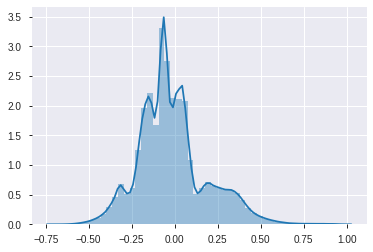

In [31]:
sns.distplot(normalized_df)

In [37]:
x_train_data=train_data1.drop(['Default_payment_Oct20'],axis=1)
x_train_data.head(2)

Customer_id  Balance_limit  Gender  Education  Marital_status  \
0       115337       252000.0       0          1               0   
1       117160        60000.0       0          3               2   

   Age_in_years  Pay_status_Apr20  Pay_status_May20  Pay_status_Jun20  \
0          47.0              -1.0              -1.0              -1.0   
1          41.0               1.0               2.0               2.0   

   Pay_status_Jul20  ...  Bill_amount_Jun20  Bill_amount_Jul20  \
0              -1.0  ...              475.0              475.0   
1               2.0  ...            20790.0            20105.0   

   Bill_amount_Aug20  Bill_amount_Sep20  Pay_amount_Apr20  Pay_amount_May20  \
0              475.0              475.0             475.0             475.0   
1            20610.0            21106.0             360.0            3600.0   

   Pay_amount_Jun20  Pay_amount_Jul20  Pay_amount_Aug20  Pay_amount_Sep20  
0             475.0             475.0             475.0             475.0  
1               0.0            1200.0             828.0             780.0  

[2 rows x 24 columns]

In [38]:
y_train_data=train_data1['Default_payment_Oct20']
y_train_data.tail(2)

23998    1
23999    1
Name: Default_payment_Oct20, dtype: int64

In [40]:
#Test train split
# Create the classifier and train using training data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(x_train_data,y_train_data,test_size=0.2)
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [41]:
train_score=classifier.score(X_train,y_train)
train_score

0.7797916666666667

In [42]:
test_score=classifier.score(X_test,y_test)
test_score

0.7733333333333333

In [43]:
pred=classifier.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
pd.DataFrame({'actual':y_test,'new_predict':pred})

actual  new_predict
16377       0            0
17263       1            0
7776        0            0
10919       0            0
4144        0            0
...       ...          ...
7177        0            0
13407       0            0
19965       0            0
13180       1            0
12997       0            0

[4800 rows x 2 columns]

In [62]:
x=0 # could change x and y to a start and end date
y=4799 
test=test_data.loc[x:y]

In [63]:
test_pred=classifier.predict(test)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
test_pred.shape

(4800,)

In [65]:
train_data1.shape

(24000, 25)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19200, 24)
(4800, 24)
(19200,)
(4800,)


In [67]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3712
           1       0.00      0.00      0.00      1088

    accuracy                           0.77      4800
   macro avg       0.39      0.50      0.44      4800
weighted avg       0.60      0.77      0.67      4800



In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,test_pred)
cm

array([[3712,    0],
       [1088,    0]])